In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,precision_recall_curve
import numpy as np
import pandas as pd
import xgboost
from sklearn.model_selection import RandomizedSearchCV


In [0]:
df = pd.read_csv("/content/Case_D_Pharma_Food_Data.csv")

In [0]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12,3,1
1,5,6,12,7,1
2,6,2,13,6,1
3,4,2,12,1,1
4,4,2,12,3,1


In [0]:
df.shape

(490, 5)

In [0]:
len(df['Spoiled'].values)

490

In [0]:
len(df['Spoiled']=="0")

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


490

In [0]:
df.isnull().sum()

A          0
B          0
C          0
D          0
Spoiled    0
dtype: int64

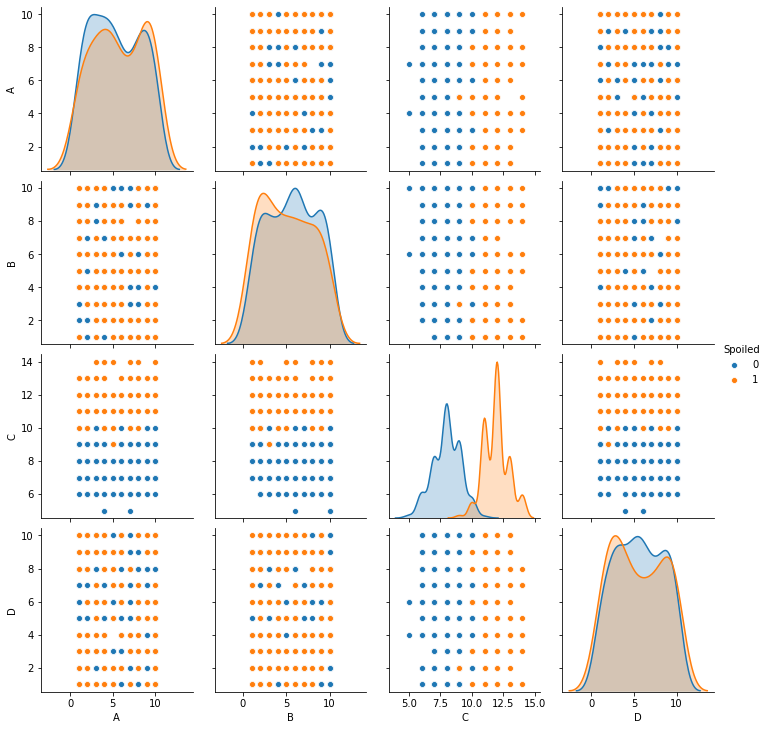

In [0]:
sns.pairplot(df,hue="Spoiled")

In [0]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]
x.corr()

,A,B,C,D
A,1.000000,0.007267,0.057588,-0.045834
B,0.007267,1.000000,-0.117222,-0.036436
C,0.057588,-0.117222,1.000000,-0.034477
D,-0.045834,-0.036436,-0.034477,1.000000


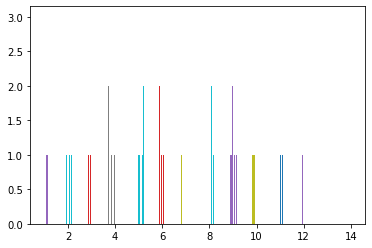

In [0]:
fig=plt.hist(x,bins=30)

In [0]:
# Fit a OLS Model On X freatures
import statsmodels.api as sm
x=sm.add_constant(x)
x.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,A,B,C,D
0,1.0,4,2,12,3
1,1.0,5,6,12,7
2,1.0,6,2,13,6
3,1.0,4,2,12,1
4,1.0,4,2,12,3


In [0]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Spoiled   R-squared (uncentered):                   0.592
Model:                            OLS   Adj. R-squared (uncentered):              0.589
Method:                 Least Squares   F-statistic:                              176.3
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                    3.43e-93
Time:                        19:58:54   Log-Likelihood:                         -168.68
No. Observations:                 490   AIC:                                      345.4
Df Residuals:                     486   BIC:                                      362.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             -0.0228      0.005     -4.520      0.000      -0.033      -0.013
B             -0.0359      0.005     -7.272      0.000      -0.046      -0.026
C              0.0910      0.005     19.753      0.000       0.082       0.100
D             -0.0320      0.005     -6.372      0.000      -0.042      -0.022
==============================================================================
Omnibus:                       38.043   Durbin-Watson:                   0.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.297
Skew:                           0.533   Prob(JB):                     1.60e-07
Kurtosis:                       2.371   Cond. No.                         5.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AS we see Standard devation is low also P value also less than 0.5 So we Assume That There is No Correlation Between any Preservative

In [0]:
# AS we see Standard devation is low also P value also less than 0.5

In [0]:
x.head()

,A,B,C,D
0,4,2,12,3
1,5,6,12,7
2,6,2,13,6
3,4,2,12,1
4,4,2,12,3


In [0]:
# Detecting Outliers 
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.52049862 1.22912148 1.3993397  0.90450984 1.58113883]
 [0.18134393 0.17395254 1.3993397  0.49805289 1.58113883]
 [0.15781075 1.22912148 1.88632581 0.14741221 1.58113883]
 ...
 [1.53796266 0.87835297 0.54860477 0.90450984 0.63245553]
 [0.15781075 0.17395254 0.54860477 0.90450984 0.63245553]
 [1.53796266 1.22625806 1.03559088 0.55386916 0.63245553]]


In [0]:
threshold = 3
print(np.where(z > 3))
# So there is No any Outliers are present in dataset

(array([], dtype=int64), array([], dtype=int64))


<Figure size 1440x1440 with 0 Axes>

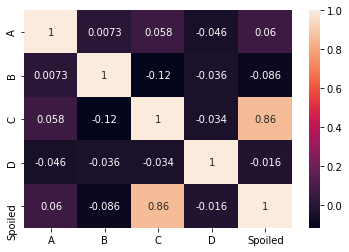

<Figure size 1440x1440 with 0 Axes>

In [0]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(20,20))

In [0]:
def abhi(df):
  df1=pd.DataFrame(data=df)

df1=df.fillna(df.mean())
df1=df.dropna()
x=df.iloc[:,0:4]
y=df.iloc[:,-1]

# Importing LabelEncoder and initializing it 
le=LabelEncoder()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

# Iterating over all the common columns in train and test
for col in x_test.columns.values:
       # Encoding only categorical variables
       if x_test[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
           data=x_train[col].append(x_test[col])
           le.fit(data.values)
           x_train[col]=le.transform(x_train[col])
           x_test[col]=le.transform(x_test[col])

# Iterating over all the common columns in train and test
for col in x_test.columns.values:
       # Encoding only categorical variables
       if x_test[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
           data=x_train[col].append(x_test[col])
           le.fit(data.values)
           x_train[col]=le.transform(x_train[col])
           x_test[col]=le.transform(x_test[col])

# pipeline for Logistic Regression

Abhi_lr=Pipeline([('Scalar1', StandardScaler()),
                  ('PCA_1',PCA(n_components=2)),
                  ('lr_classifier',LogisticRegression(random_state=0))
                  ])

# pipeline for KNN Classifier
Abhi_kn=Pipeline([('Scalar1', StandardScaler()),
                  ('lr_classifier',KNeighborsClassifier())
                  ])

# pipeline for Decision Tree Classifier
Abhi_dt = Pipeline([('Scalar2', StandardScaler()),
                  ('dt_classifier',DecisionTreeClassifier(random_state=0))
                  ])
# pipeline for Random Forest Classifier
Abhi_rf = Pipeline([('Scalar3', StandardScaler()),
                  ('rf_classifier',RandomForestClassifier(random_state=0,))
                  ])
# pipeline for XG Boost Classifier
Abhi_xg = Pipeline([('Scalar3', StandardScaler()),
                  ('rf_classifier',xgboost.XGBClassifier(random_state=0,))
                  ])

# making the List Of Piplines
Abhi_Pipelines = [Abhi_lr,Abhi_kn,Abhi_dt,Abhi_rf,Abhi_xg]

best_accuracy=0
best_classifier=0
best_pipeline=""

# Creating Dictionary of piplines
pipe_dict = {0:"Logistic Regression",1:"KNN Classifier",2:"Decision Tree",3:"Random Forest",4:"XG Boost"}

# Fitting Pipelines
for pipe in Abhi_Pipelines:
  pipe.fit(x_train,y_train)

for i,model in enumerate(Abhi_Pipelines):
  print("{} Train Accuracy: {}".format(pipe_dict[i],model.score(x_train,y_train)))

for i,model in enumerate(Abhi_Pipelines):
  print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

for i, model in enumerate(Abhi_Pipelines):
  if model.score(x_test,y_test)>best_accuracy:
    best_accuracy=model.score(x_test,y_test)
    best_pipeline=model
    best_classifier=i
print("\n Classifier with best accuracy:{}".format(pipe_dict[best_classifier]))

abhi(df)


Logistic Regression Train Accuracy: 0.8104956268221575
KNN Classifier Train Accuracy: 0.9825072886297376
Decision Tree Train Accuracy: 0.9941690962099126
Random Forest Train Accuracy: 0.9941690962099126
XG Boost Train Accuracy: 0.9883381924198251
Logistic Regression Test Accuracy: 0.891156462585034
KNN Classifier Test Accuracy: 0.9591836734693877
Decision Tree Test Accuracy: 0.9591836734693877
Random Forest Test Accuracy: 0.9795918367346939
XG Boost Test Accuracy: 0.9659863945578231

 Classifier with best accuracy:Random Forest


**Classification Report Of RANDOM FOREST CLASSIFIER**

In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,precision_recall_curve,r2_score
y_pred= Abhi_rf.predict(x_test)

In [0]:
print(confusion_matrix(y_test,y_pred))

[[103   3]
 [  0  41]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       106
           1       0.93      1.00      0.96        41

    accuracy                           0.98       147
   macro avg       0.97      0.99      0.98       147
weighted avg       0.98      0.98      0.98       147



**Classification Report Of XGBOOST CLASSIFIER**

In [0]:
y_pred= Abhi_xg.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[103   3]
 [  0  41]]


In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       106
           1       0.93      1.00      0.96        41

    accuracy                           0.98       147
   macro avg       0.97      0.99      0.98       147
weighted avg       0.98      0.98      0.98       147



# **TPOT AUTUML Model**

In [0]:
!pip install tpot

     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 163kB 13.7MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=094f8ed3cb360c1113ede18a718049e79efd2a69a7c544fda266844998754c47
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [0]:
from tpot import TPOTClassifier

In [0]:

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((367, 4), (123, 4), (367,), (123,))

In [0]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=10)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.9808959644576083
Generation 2 - Current best internal CV score: 0.9808959644576083
Generation 3 - Current best internal CV score: 0.9808959644576083
Generation 4 - Current best internal CV score: 0.9808959644576083
Generation 5 - Current best internal CV score: 0.9808959644576083
Generation 6 - Current best internal CV score: 0.9808959644576083
Generation 7 - Current best internal CV score: 0.9808959644576083
Generation 8 - Current best internal CV score: 0.9808959644576083
Generation 9 - Current best internal CV score: 0.983598667160311
Generation 10 - Current best internal CV score: 0.983598667160311
Generation 11 - Current best internal CV score: 0.983598667160311
Generation 12 - Current best internal CV score: 0.983598667160311

10.06 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(input_matrix, le

In [0]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=1.0,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=9, missing=None,
                               n_estimators=100, n_jobs=1, nthread=1,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=0.5,
                               verbosity=1))],
         verbose=False)

In [0]:
print(tpot.score(X_test, y_test))

0.983739837398374


# AS WE Seen TPOT AUTOML gives Best Accuracy Compare To Above Randam Forest Classifier